In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('advertising.csv')

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
dataset['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

In [6]:
import seaborn as sns

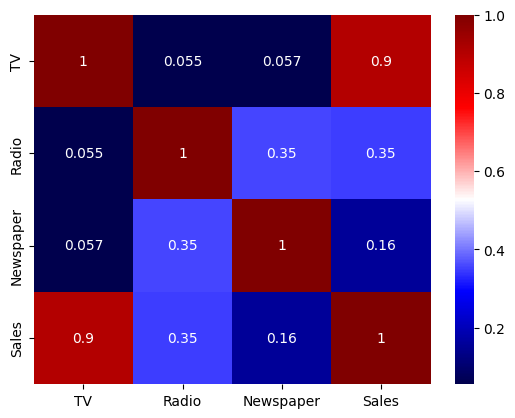

In [7]:
sns.heatmap(dataset.corr(), cmap="seismic", annot = True)
plt.show()

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [11]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

2.858380471319992

In [16]:
r2_score(y_test, y_pred)

0.9125420182627615

In [17]:
def predict_new_data(new_data):
    new_data = pd.DataFrame(new_data).values
    new_data = sc.transform(new_data)
    return regressor.predict(new_data)

### We can individually predict the sales based on the required data for prediction. We have predicted the sales of a data, which is as follows:

# **Single Data:**
  * The predicted sales **`21.24`**, while the original sales value is **`22.1`**

In [18]:
data = {
    'TV' : [230.1],
    'Radio' : [37.8],
    'Newspaper' : [69.2]
}

In [19]:
predict_new_data(data)

array([21.24465645])